In [ ]:
# Q1. What is the mathematical formula for a linear SVM?

A linear Support Vector Machine (SVM) aims to find a hyperplane that best separates data points of different classes in a feature space. The decision function for a linear SVM is given by:

f(x) = w^T x + b

Here, 
w is the weight vector, 
x is the input feature vector, and 
b is the bias term.

# Q2. What is the objective function of a linear SVM?

The objective of a linear SVM is to maximize the margin between the two classes while minimizing classification errors. This is achieved by solving the following optimization problem:

min w,b 1/2 ||w||^2W
Subject to the constraints: y𝑖 (w^T x𝑖 + b) ≥ 1 ∀𝑖
where y𝑖 is the class label of the i-th training example, and xi is the corresponding feature vector.
    
# Q3. What is the kernel trick in SVM?

The kernel trick is a technique that allows SVMs to perform classification in higher-dimensional spaces without explicitly computing the coordinates of the data in that space. By applying a kernel function 
K(xi,xj), which computes the inner product of two vectors in a higher-dimensional space, SVMs can efficiently handle non-linear decision boundaries.


# Q4. What is the role of support vectors in SVM Explain with example.

Support vectors are the data points that lie closest to the decision boundary (hyperplane) and are critical in defining its position and orientation. These points are the most informative for the classifier, as removing them would alter the optimal hyperplane. 
Example:Consider a 2D dataset with two classes: Class A and Class B. The support vectors are the points from each class that are nearest to the decision boundary. The optimal hyperplane is determined by these support vectors, and the margin is the distance between the hyperplane and the nearest support vectors from either class.

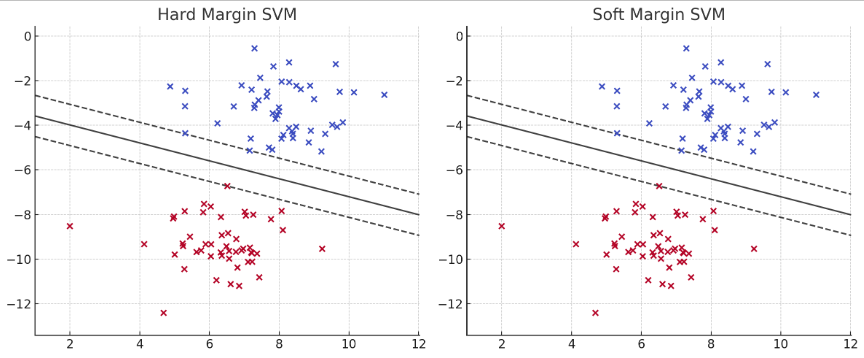

In [8]:
#Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

# 1. Hyperplane: The hyperplane is a decision boundary that separates data points belonging to different classes. In a 2D space, the hyperplane is a line; in 3D, it is a plane; and in higher dimensions, 
#                it is a generalization. Ex: If we have two classes (red and blue), the hyperplane is the line that maximizes the separation between the two classes.

# 2. Marginal Plane: The marginal planes are parallel lines or planes that define the boundaries of the margin. These are determined by the support vectors (data points closest to the hyperplane). The margin is the region between these planes, and the goal of SVM is to maximize this margin.
#                    Ex: For the red and blue classes, the marginal planes are the boundaries where the nearest data points (support vectors) of each class lie.

# 3. Hard Margin: The hard margin is used when the data is perfectly linearly separable. There are no misclassifications, and all points lie outside the margin boundaries.
#                 Ex: When two classes of data points (red and blue) are perfectly separated, the SVM places a hyperplane with a margin such that no point crosses the margin boundary.

# 4. Soft Margin: The soft margin is used when the data is not linearly separable. It allows some misclassifications or margin violations by introducing a slack variable.
#                 Ex: For overlapping red and blue points, the SVM allows some points to be inside the margin or on the wrong side of the hyperplane while still aiming to maximize the margin and minimize misclassification.

# Graph
from IPython.display import Image as IPImage, display
display(IPImage(filename="hello.png"))

# The graphs illustrate the differences between Hard Margin SVM and Soft Margin SVM:
# Hard Margin SVM: The hyperplane separates the two classes perfectly, with no data points inside the margin. It is suitable for perfectly linearly separable data.
# Soft Margin SVM: The hyperplane accommodates some misclassifications or margin violations. It is more robust for datasets with overlapping classes or outliers.

In [ ]:
# Q6. SVM Implementation through Iris dataset.

# ~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
# ~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
# ~ Compute the accuracy of the model on the testing setl
# ~ Plot the decision boundaries of the trained model using two of the featuresl
# ~ Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = iris.data[:, 2:4]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm.fit(X_train, y_train)

h = .02  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Linear Kernel Decision Boundary')
plt.show()

In [ ]:
C_values = [0.1, 1, 10]
for C in C_values:
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with C={C}: {accuracy:.2f}')

In [ ]:
# Bonus task: Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_blobs(n_samples=200, centers=2, cluster_std=1.2, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for SVM

# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------
# 1. Linear SVM From Scratch
# -------------------------
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # No penalty
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Apply hinge loss
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)

# Train SVM from scratch
svm_scratch = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_scratch.fit(X_train, y_train)
y_pred_scratch = svm_scratch.predict(X_test)

# -------------------------
# 2. Linear SVM with Scikit-learn
# -------------------------
svm_sklearn = SVC(kernel='linear', C=1.0)
svm_sklearn.fit(X_train, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test)

# -------------------------
# 3. Comparison
# -------------------------
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print("Accuracy of SVM from scratch:", accuracy_scratch)
print("Accuracy of SVM (scikit-learn):", accuracy_sklearn)

# -------------------------
# Visualization
# -------------------------
def plot_decision_boundary(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    if isinstance(model, LinearSVM):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, levels=[-1, 0, 1], cmap='coolwarm', linestyles=['--', '-', '--'])
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(X_test, y_test, svm_scratch, "SVM from Scratch", axes[0])
plot_decision_boundary(X_test, y_test, svm_sklearn, "SVM (scikit-learn)", axes[1])
plt.tight_layout()
plt.show()
